<img src="../images/aeropython_name_mini.png" alt="AeroPython" style="width: 300px;"/>

# Clase 4a: SciPy

_`SciPy` es paquete que incluye una colección de algoritmos matemáticos y funciones construidas sobre el paquete `NumPy`. En definitiva, nos proporciona una serie de comandos de alto nivel para realizar acciones como:_

* Integración numérca.
* Resolver un sistema de ecuaciones por el _método de Newton_, bisección...
* Resolver EDOs.
    
_Incluso otras más especializadas como:_

* [Ajuste e interpolación de datos.](http://pybonacci.wordpress.com/2013/08/15/ajuste-e-interpolacion-unidimensionales-basicos-en-python-con-scipy/)
* [Teoría de control](http://pybonacci.wordpress.com/2013/10/10/teoria-de-control-en-python-con-scipy-i/).
* Procesamiento de imágenes.
* Estadística.
* ...

_Cada una de estas tareas pertenece a un subpaquete distinto de `SciPy`. __En la clase de hoy nos centraremos en las tres primeras__, pero seguro que si quieres hincarle el diente a alguna de las otras no tienes ningún problema._



|   Subpackage   | Description |
| ----------     | :---       |
| constants      |    Physical and mathematical constants         |
| integrate      |    Integration and ordinary differential equation solvers |
| interpolate    |	Interpolation and smoothing splines |
| linalg         |	Linear algebra |
| signal         |	Signal processing |
| special        | 	Special functions |
| stats          |	Statistical distributions and functions |

# Importación: algunos ejemplos

Como siempre lo primero es lo primero, __importemos__ lo paquetes que vamos a utilizar:

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

¿Cómo importamos SciPy?

`import scipy as ...`


Bueno, en realidad `SciPy` nos ofrece muchas funciones y rara vez querremos usarlo todo en una misma sesión. __Típicamente usaremos:__

    from scipy import ...

In [2]:
from scipy import special

In [3]:
np.info(special)

Special functions (:mod:`scipy.special`)

.. module:: scipy.special

Nearly all of the functions below are universal functions and follow
broadcasting and automatic array-looping rules. Exceptions are noted.

Error handling

Errors are handled by returning nans, or other appropriate values.
Some of the special function routines will emit warnings when an error
occurs.  By default this is disabled.  To enable such messages use
``errprint(1)``, and to disable such messages use ``errprint(0)``.

Example:

    >>> print scipy.special.bdtr(-1,10,0.3)
    >>> scipy.special.errprint(1)
    >>> print scipy.special.bdtr(-1,10,0.3)

.. autosummary::
   :toctree: generated/

   errprint

Available functions

Airy functions
--------------

.. autosummary::
   :toctree: generated/

   airy     -- Airy functions and their derivatives.
   airye    -- Exponentially scaled Airy functions
   ai_zeros -- [+]Zeros of Airy functions Ai(x) and Ai'(x)
   bi_zeros -- [+]Zeros of Airy functions Bi(x) and Bi'(x

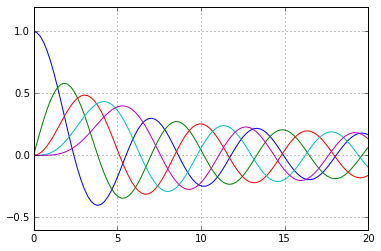

In [4]:
x = np.linspace(0,20,100)
for ii in range(5):
    plt.plot(x, special.jn(ii, x))
plt.grid(True)

# scipy.integrate

Este subpaquete de `SciPy` proporciona algunas __técnicas de integración tanto de funciones como de ecuaciones diferenciales__. En primer lugar importémoslo y ejecutemos la ayuda para ver cuáles son estas funciones:

In [5]:
from scipy import integrate

In [6]:
from IPython.display import HTML
HTML('<iframe src="http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate" width="800" height="600"></iframe>')

In [7]:
help(integrate)

Help on package scipy.integrate in scipy:

NAME
    scipy.integrate

DESCRIPTION
    Integration and ODEs (:mod:`scipy.integrate`)
    
    .. currentmodule:: scipy.integrate
    
    Integrating functions, given function object
    
    .. autosummary::
       :toctree: generated/
    
       quad          -- General purpose integration
       dblquad       -- General purpose double integration
       tplquad       -- General purpose triple integration
       nquad         -- General purpose n-dimensional integration
       fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
       quadrature    -- Integrate with given tolerance using Gaussian quadrature
       romberg       -- Integrate func using Romberg integration
    
    Integrating functions, given fixed samples
    
    .. autosummary::
       :toctree: generated/
    
       cumtrapz      -- Use trapezoidal rule to cumulatively compute integral.
       simps         -- Use Simpson's rule to compute integra

### quad

Como se puede ver en la ayuda, si queremos realizar una _integración numérica_ de una función de una variable, debemos utilizar `quad` (aunque también podemos usar `trapz`, `simps`... La forma de acceder a ella tal y como hemos importado el paquete sería ejecutando `integrate.quad`. Sin emabrgo, sería más normal importar del siguiete modo:

In [8]:
from scipy.integrate import quad

De este modo se puede usar la función quad, simplemente como `quad`. Pero todavía no sabemos cómo funciona, ¿te atreves a investigarlo tú?

In [9]:
help(quad)

Help on function quad in module scipy.integrate.quadpack:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
    
    Parameters
    ----------
    func : function
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
    a : float
        Lower limit of integration (use -numpy.inf for -infinity).
    b : float
        Upper limit of integration (use numpy.inf for +infinity).
    args : tuple, optional
        Extra arguments to pass to `func`.
    full_output : int, optional
        Non-zero to return a dictionary of integration information.
        If non-zero, warning messages are also suppressed and the
       

Quizá [esta ayuda](http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) te resulte más atractiva.

¿Qué es lo primero que necesitamos hacer para integrar una función? Pues sí, la función... definamos una:

$$f(x) = x \cdot sin(x)$$

In [10]:
def fun(x):
    return x * np.sin(x)

##### Ejercicio

Antes de integrarla genera esta gráfica:

![](../images/quad_xsinx.png)

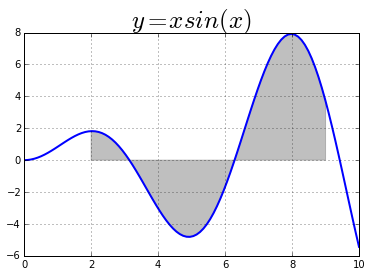

In [11]:
x = np.linspace(0,10,100)
y = fun(x)

plt.title('$y = x sin(x)$', fontsize = 25)

plt.plot(x,y, linewidth = 2)

x_fill = np.linspace(2,9,100)
y_fill = fun(x_fill)
plt.fill_between(x_fill, y_fill, color='gray', alpha=0.5)

plt.grid()

#### Ahora integremos con `quad`

__Integremos__ la función en el intervalo $[2, 9]$. Recuerda que esto te calcula la integral, _no el área_:

In [12]:
value, err = quad(fun, 2, 9)
print("El resultado es: ", value, "con un error de: ", err)

El resultado es:  6.870699742283883 con un error de:  2.864870105641461e-13


#### Simpson y trapecio

Según figura en la documentación a estos métodos hay que pasarles las coordenadas de los puntos (no la función). Esto puede ser útil si no disponemos de una función, sino de una serie da valores, que por ejemplo, provienen de un experimento.

![](../images/trap_xsinx.png)

In [13]:
x = np.linspace(2,9,100)

value = integrate.trapz(fun(x), x)

print("El resultado es: ", value)

El resultado es:  6.86742266171


In [14]:
x = np.linspace(2,9,100)

value = integrate.simps(fun(x), x)

print("El resultado es: ", value)

El resultado es:  6.8705759095


## scipy.stats

Este módulo contiene un gran número de __distribuciones de probabilidad__, tanto continuas como discretas, así como un creciente número de __funciones estadísticas__.

In [15]:
# Importar el módulo entero
import scipy.stats as st

In [16]:
# Información
np.info(st)

Statistical functions (:mod:`scipy.stats`)

.. module:: scipy.stats

This module contains a large number of probability distributions as
well as a growing library of statistical functions.

Each included distribution is an instance of the class rv_continous:
For each given name the following methods are available:

.. autosummary::
   :toctree: generated/

   rv_continuous
   rv_continuous.pdf
   rv_continuous.logpdf
   rv_continuous.cdf
   rv_continuous.logcdf
   rv_continuous.sf
   rv_continuous.logsf
   rv_continuous.ppf
   rv_continuous.isf
   rv_continuous.moment
   rv_continuous.stats
   rv_continuous.entropy
   rv_continuous.fit
   rv_continuous.expect

Calling the instance as a function returns a frozen pdf whose shape,
location, and scale parameters are fixed.

Similarly, each discrete distribution is an instance of the class
rv_discrete:

.. autosummary::
   :toctree: generated/

   rv_discrete
   rv_discrete.rvs
   rv_discrete.pmf
   rv_discrete.logpmf
   rv_discrete.cdf
   

### Funciones

Carguemos unos datos, por ejemplo unas notas de la carrera, y veamos cómo podemos aprovechar las funciones de `scipy.stats`.

In [17]:
# esta línea no funciona en Windows
!head ../images/notas.csv

In [18]:
# Leemos el archivo
datos = np.loadtxt("../images/notas.csv", skiprows=1)
datos

array([ 2.9,  4.3,  3.9,  0. ,  4.1,  7.3,  2.3,  5.6,  2.9,  3.9,  4.6,
        6.3,  2.1,  2.1,  6.5,  1.9,  0. ,  6.5,  2.5,  5.1,  5.3,  6.3,
        5.4,  5.3,  5.3,  2. ,  3.5,  4.4,  5.5,  3.6,  3.9,  2.5,  4.1,
        3. ,  4.6,  4. ,  6.3,  0.6,  2.4,  6.5,  2.3,  4.6,  6.9,  5.1,
        5.4,  5.3,  4.5,  6.5,  2.1,  5.5,  3.4,  8.1,  4. ,  1.9,  1.6,
        4.3,  4.6,  5.4,  1. ,  6.5,  5.5,  4.9,  4. ,  5.3,  3.5,  4.4,
        2.8,  5.4,  3.5,  2.3,  4.8,  2.1,  6.6,  0.5,  2.1,  3.1,  3.4,
        5.9,  3.4,  4.3,  1.5,  5.5,  4.4,  1.9,  4.4,  2.9,  3.9,  5.8,
        2.8,  3. ,  1.5,  2.6,  2.9,  3.4,  5.4,  3.6,  4.6,  5. ,  1.4,
        4.3,  4.6,  3.1,  2. ,  3.6,  4. ,  2.5,  3. ,  5.1,  6.4,  3.5,
        5.8,  4.1,  5.9,  4. ,  6.4,  2.3,  7. ,  1.4,  3.5,  4.4,  2.9,
        5.1,  3.4,  4.8,  4.6,  4.3,  6.9,  5.4,  4. ,  3.3,  1.4,  1.9,
        3.8,  3.4,  3.6,  3.8,  6.3,  4.8,  4. ,  6.8,  4. ,  3.6,  4.4,
        4.1,  6. ,  4.1,  5.6,  3.9,  4.6,  5. ,  6

In [19]:
# Descripción rápida de los datos
st.describe(datos)

(375,
 (0.0, 8.5),
 3.9706666666666668,
 2.5927736185383243,
 -0.13203546994646295,
 -0.06611485627230884)

In [20]:
# Histograma con st
st.histogram(datos, numbins=10, defaultlimits=(0,10))

(array([ 17.,  20.,  61.,  78.,  98.,  61.,  29.,   9.,   2.,   0.]),
 0,
 1.0,
 0)

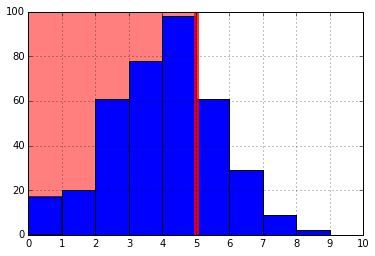

In [21]:
# Pintemos un histograma con plt
plt.hist(datos, range(0,11,))
plt.xticks(range(0,11))
plt.grid(True)

plt.vlines(5, 0, 100, lw=5, colors='red', alpha=0.8)
plt.fill_between([0, 5], [100, 100], color='red', alpha=0.5)

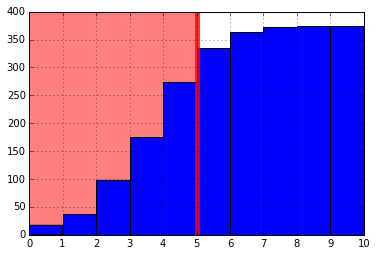

In [22]:
# Pintemos un histograma acumulado con plt
plt.hist(datos, range(0,11), cumulative=True)
plt.xticks(range(0,11))

plt.vlines(5, 0, 400, lw=5, colors='red', alpha=0.8)
plt.fill_between([0, 5], [400, 400], color='red', alpha=0.5)

plt.grid(True)

In [23]:
# Percentil
st.percentileofscore(datos, 5)

73.733333333333334

In [24]:
# Nota de un percentil
st.scoreatpercentile(datos, 50)

4.0

__¿Te parecen _normales_ estas notas?__ No, no me refiero a si te gustan o no... Me refiero a que si crees que estas notas se distribuyen de manera gaussiana.

### Distribuciones estadísticas

In [25]:
# Parámetros
med = st.nanmean(datos)
des_tip = st.nanstd(datos)

# Distribución normal
dist_normal = st.norm(loc=med, scale=des_tip)

Ahora podemos ver:

* Función densidad de probabilidad (probability density function) `pdf`
* Función de distribución (cumulative distribution function) `cdf`

De esta manera, nos ahorramos definir funciones como:

$$N(\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

$$\phi(x)=\intop_{-\infty}^{x}\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}dx$$

Para calcular probabilidades $P[a\leq X\leq b]=\intop_{a}^{b}f(x)dx$



In [26]:
# Calculamos la pdf
x = np.linspace(0, 10, 100)
y1 = dist_normal.pdf(x)
y1

array([  1.18466112e-02,   1.38013272e-02,   1.60154276e-02,
         1.85117381e-02,   2.13131100e-02,   2.44420387e-02,
         2.79202305e-02,   3.17681221e-02,   3.60043569e-02,
         4.06452262e-02,   4.57040834e-02,   5.11907430e-02,
         5.71108776e-02,   6.34654270e-02,   7.02500358e-02,
         7.74545375e-02,   8.50625018e-02,   9.30508640e-02,
         1.01389654e-01,   1.10041839e-01,   1.18963303e-01,
         1.28102958e-01,   1.37403018e-01,   1.46799426e-01,
         1.56222440e-01,   1.65597374e-01,   1.74845495e-01,
         1.83885049e-01,   1.92632412e-01,   2.01003342e-01,
         2.08914298e-01,   2.16283816e-01,   2.23033887e-01,
         2.29091330e-01,   2.34389108e-01,   2.38867558e-01,
         2.42475512e-01,   2.45171267e-01,   2.46923389e-01,
         2.47711323e-01,   2.47525793e-01,   2.46368984e-01,
         2.44254502e-01,   2.41207102e-01,   2.37262214e-01,
         2.32465247e-01,   2.26870729e-01,   2.20541268e-01,
         2.13546393e-01,

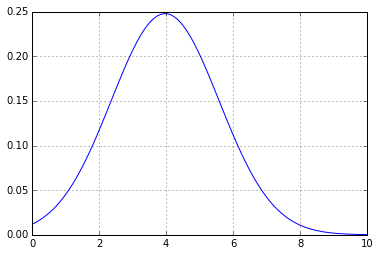

In [27]:
# La representamos
plt.plot(x, y1)
plt.grid(True)

In [28]:
# Calculamos la cdf
y2 = dist_normal.cdf(x)
y2

array([ 0.00683286,  0.00812612,  0.00962974,  0.01137106,  0.01337976,
        0.01568777,  0.0183293 ,  0.02134067,  0.02476018,  0.02862791,
        0.03298542,  0.03787547,  0.04334158,  0.04942765,  0.05617737,
        0.06363372,  0.07183834,  0.08083088,  0.0906483 ,  0.1013242 ,
        0.11288805,  0.12536454,  0.13877285,  0.15312598,  0.1684302 ,
        0.18468445,  0.20187994,  0.21999975,  0.2390186 ,  0.25890272,
        0.27960985,  0.30108939,  0.32328269,  0.34612342,  0.36953818,
        0.39344715,  0.41776493,  0.44240138,  0.46726269,  0.49225242,
        0.5172726 ,  0.54222491,  0.56701185,  0.59153783,  0.61571033,
        0.63944089,  0.66264614,  0.68524861,  0.70717752,  0.72836942,
        0.74876866,  0.76832781,  0.78700782,  0.80477817,  0.82161679,
        0.83750988,  0.85245164,  0.86644386,  0.87949545,  0.89162183,
        0.90284437,  0.91318964,  0.92268879,  0.93137677,  0.93929165,
        0.94647392,  0.95296581,  0.95881062,  0.96405221,  0.96

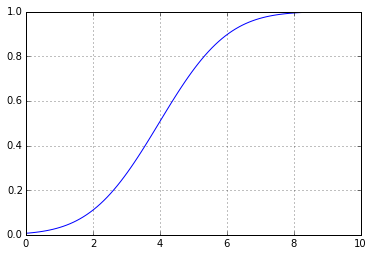

In [29]:
# La representamos
plt.plot(x, y2)
plt.grid(True)

Del mismo modo se pueden usar otras distribuciones continuas o discretas e incluso, definir distribuciones propias. Pero sigamos con las notas...

### Tests

Ahora que ya hemos visualizado la distribución de las notas y que sabemos generar distribuciones normales. ¿Por qué no hacemos un [test de Kolmogórov-Smirnov](http://www.dmae.upm.es/WebpersonalBartolo/Probabilidad/14_ContrasteNoparametrico.pdf)?

Se trata de ver lo bien o lo mal que se ajusta la distribución a una normal con $\mu=3.97$ y $\sigma²=2.57$

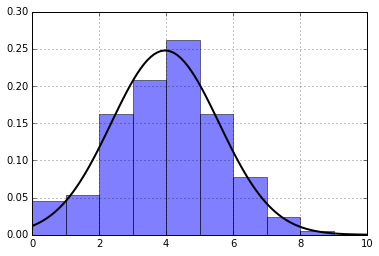

In [30]:
bars = st.histogram(datos, numbins=10, defaultlimits=(0,10))[0]
bars /= 375

plt.bar(np.arange(0,10), bars, alpha=0.5, width=1)
plt.plot(x, y1, c='black', lw=2)

plt.grid(True)

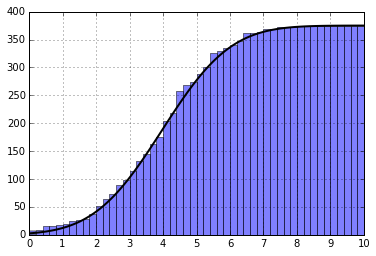

In [31]:
plt.hist(datos, np.linspace(0,10,51), cumulative=True, alpha=0.5)
plt.plot(x, y2 * 375, lw=2, c='black')

plt.xticks(range(0,11))
plt.grid(True)

In [32]:
datos2 = dist_normal.cdf
st.kstest(datos, dist_normal.cdf)

(0.04783071674813294, 0.34838712365988389)

_Se rechaza la hipótesis nula si el valor p asociado al resultado observado es igual o menor que el nivel de significación establecido, convencionalmente 0,05 ó 0,01. Es decir, el valor p nos muestra la probabilidad de haber obtenido el resultado que hemos obtenido si suponemos que la hipótesis nula es cierta._ ([Wikipedia](http://es.wikipedia.org/wiki/Valor_p))

Si probamos con `st.normaltest` que también comprueba la bondad del ajuste obtenemos un _valor-p_ más alto:

In [33]:
st.normaltest(datos)

(1.1315306710610515, 0.56792532695583819)

En definitiva, parece que las notas esta vez siguieron una normal con $\mu=3.97$ y $\sigma²=2.57$

Si te ha gustado esta clase:

<a href="https://twitter.com/share" class="twitter-share-button" data-url="https://github.com/AeroPython/Curso_AeroPython" data-text="Aprendiendo Python con" data-via="pybonacci" data-size="large" data-hashtags="AeroPython">Tweet</a>
<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

---

#### <h4 align="right">¡Síguenos en Twitter!

###### <a href="https://twitter.com/Pybonacci" class="twitter-follow-button" data-show-count="false">Follow @Pybonacci</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>  <a href="https://twitter.com/Alex__S12" class="twitter-follow-button" data-show-count="false" align="right";>Follow @Alex__S12</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>  <a href="https://twitter.com/newlawrence" class="twitter-follow-button" data-show-count="false" align="right";>Follow @newlawrence</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

##### <script src="//platform.linkedin.com/in.js" type="text/javascript"></script> <script type="IN/MemberProfile" data-id="http://es.linkedin.com/in/juanluiscanor" data-format="inline" data-related="false"></script> <script src="//platform.linkedin.com/in.js" type="text/javascript"></script> <script type="IN/MemberProfile" data-id="http://es.linkedin.com/in/alejandrosaezm" data-format="inline" data-related="false"></script>

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [1]:
%%html
<a href="https://twitter.com/Pybonacci" class="twitter-follow-button" data-show-count="false">Follow @Pybonacci</a>
<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

In [2]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../images/styles/style.css'
HTML(open(css_file, "r").read())